In [1]:
from edc import check_compatibility
check_compatibility("user-2023.07-01", dependencies=["GEODB"])



---------

The following environment variables are available:

* `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_DOMAIN`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_API_SERVER_PORT`


## Exploring Data




In [2]:
from xcube_geodb.core.geodb import GeoDBClient

In [3]:
# utility needed for plotting
import matplotlib.pyplot as plt

In [4]:
geodb = GeoDBClient()

### Get your user name

In [5]:
geodb.whoami

'geodb_418dfeac-15f0-4606-9edb-fd9eb722bf04'

In [6]:
ds = geodb.get_my_collections()

if ds[(ds.database == geodb.whoami) & (ds.collection == 'land_use')].collection.count() == 0:
    # Have a look at fiona feature schema
    collections = {
            "land_use": 
            {
                "crs": 3794,
                "properties": 
                {
                    "RABA_PID": "float", 
                    "RABA_ID": "float", 
                    "D_OD": "date"
                }
            }
        }


    geodb.create_collections(collections)
    import geopandas
    import os
    gdf = geopandas.read_file("/shared/eurodatacube/curated/data/sample/land_use.shp")
    geodb.insert_into_collection('land_use', gdf)

Processing rows from 0 to 999


Processing rows from 1000 to 1999
Processing rows from 2000 to 2999


Processing rows from 3000 to 3999
Processing rows from 4000 to 4999


Processing rows from 5000 to 5999
Processing rows from 6000 to 6999


Processing rows from 7000 to 7999


Processing rows from 8000 to 8999
Processing rows from 9000 to 9827


### List Datasets

__Step 1__: List all datasets a user has access to.

In [7]:
geodb.get_my_collections()

,owner,database,collection
0,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E1
1,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E10a1
2,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E10a2
3,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E11
4,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E1a
...,...,...,...
921,geodb_b34bfae7-9265-4a3e-b921-06549d3c6035,stac_test,ge_train_tier_2_labels
922,geodb_b34bfae7-9265-4a3e-b921-06549d3c6035,stac_test,ge_train_tier_2_source
923,geodb_b34bfae7-9265-4a3e-b921-06549d3c6035,stac_test,ties_ai_challenge_test
924,geodb_d2c4722a-cc19-4ec1-b575-0cdb6876d4a7,test_duplicate,test


__Step 2__: Let's get the whole content of a particular data set.

In [8]:
gdf = geodb.get_collection('land_use')
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,2,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((453810.376 91150.199, 453812.552 911...",4770325,1300,2019-03-26
2,3,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((456099.635 97696.070, 456112.810 976...",2305689,7000,2019-02-25
3,4,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
4,5,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
...,...,...,...,...,...,...,...
9822,9823,2023-07-31T10:09:30.474356+00:00,None,"POLYGON ((460637.334 96865.891, 460647.927 969...",6253989,1600,2019-03-08
9823,9824,2023-07-31T10:09:30.474356+00:00,None,"POLYGON ((459467.868 96839.686, 459467.770 968...",6252044,1600,2019-03-26
9824,9825,2023-07-31T10:09:30.474356+00:00,None,"POLYGON ((459488.998 94066.248, 459498.145 940...",6245985,2000,2019-04-08
9825,9826,2023-07-31T10:09:30.474356+00:00,None,"POLYGON ((459676.680 94000.000, 459672.469 939...",6245986,2000,2019-02-20


__Step 3__: Plot the GeoDataframe, select a reasonable column to diplay

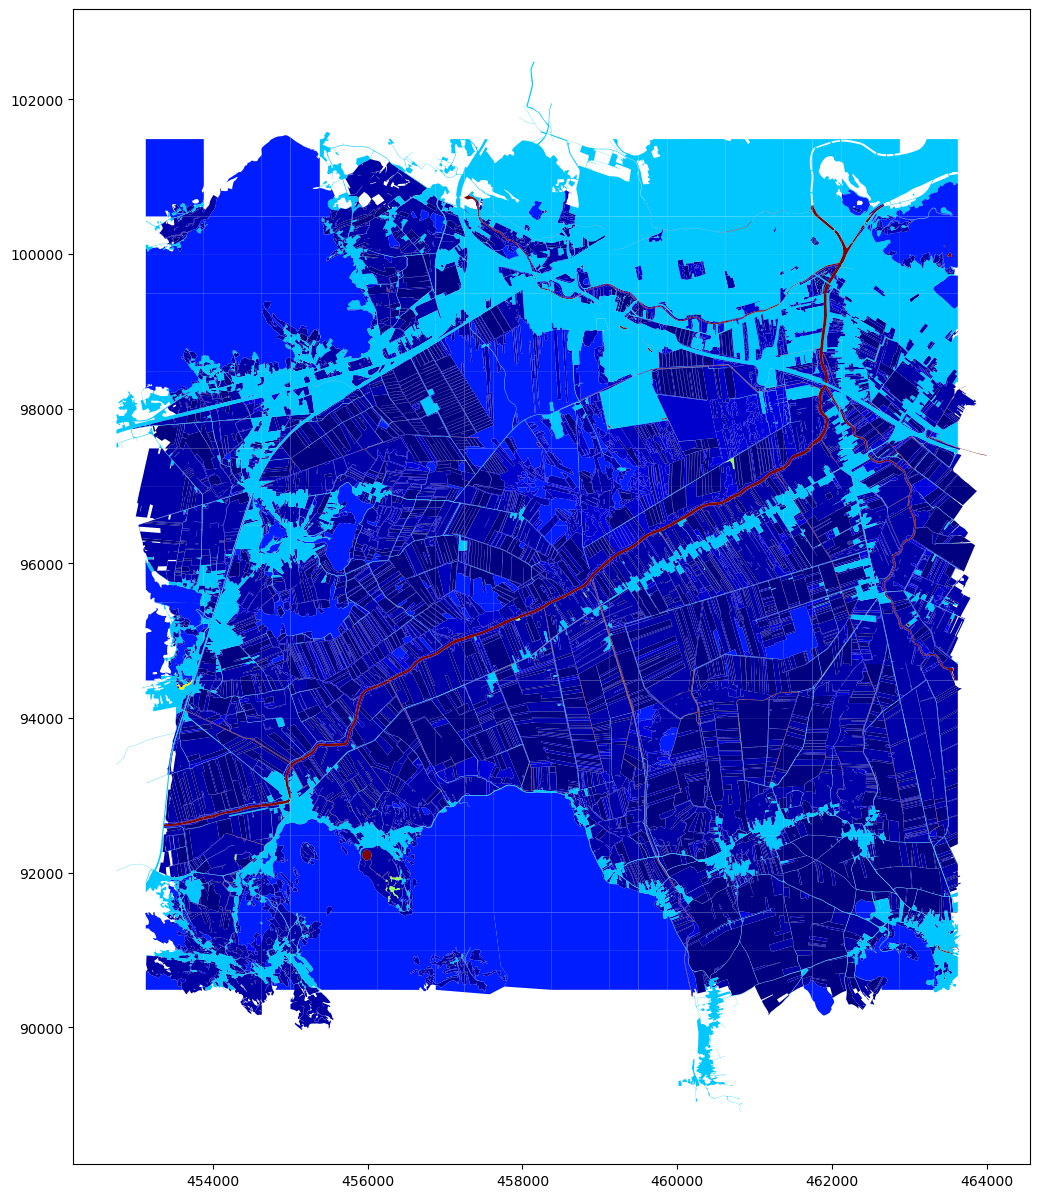

In [9]:
gdf.plot(column="raba_id", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 5__: Subselect the data. Here: Select a specific use by defining an ID value to choose 

In [10]:
gdfsub = geodb.get_collection('land_use', query='raba_id=eq.1410')
gdfsub.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


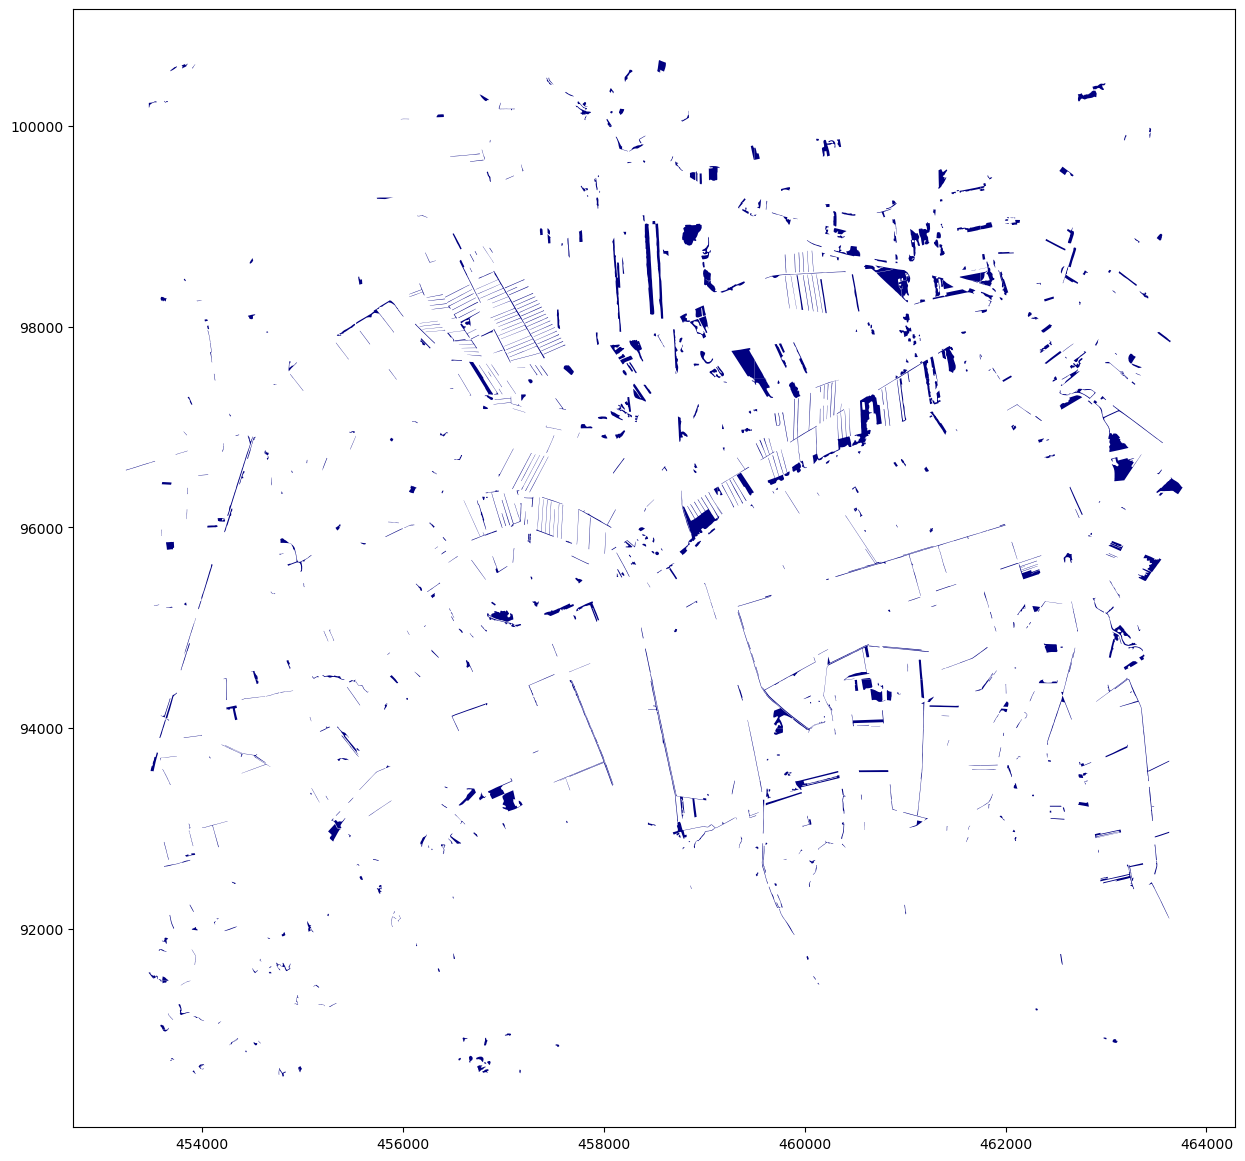

In [11]:
gdfsub.plot(column="raba_id", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 6__: Filter by bbox, limit it to 200 entries

In [12]:
gdf = geodb.get_collection_by_bbox(collection="land_use", bbox = (452750.0, 88909.549, 464000.0, 102486.299), comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,11,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((460137.998 95628.898, 460111.001 956...",5983161,1100,2019-03-11
1,12,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((453673.609 91328.224, 453678.929 913...",5983074,1600,2019-03-26
2,13,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((460312.295 96127.114, 460300.319 961...",5983199,1600,2019-03-11
3,14,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((460459.445 96117.356, 460470.516 961...",5983217,1100,2019-03-11
4,15,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((457798.753 99628.982, 457783.076 996...",6299143,1600,2019-03-04
...,...,...,...,...,...,...,...
195,206,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((458460.702 94486.435, 458450.740 944...",5966292,1321,2019-01-05
196,207,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((458469.826 94472.438, 458463.978 944...",5966293,1500,2019-03-26
197,208,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((455171.131 90548.851, 455158.322 905...",3590222,1500,2019-01-18
198,209,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((456420.815 92626.252, 456428.630 926...",6305200,1500,2019-03-14


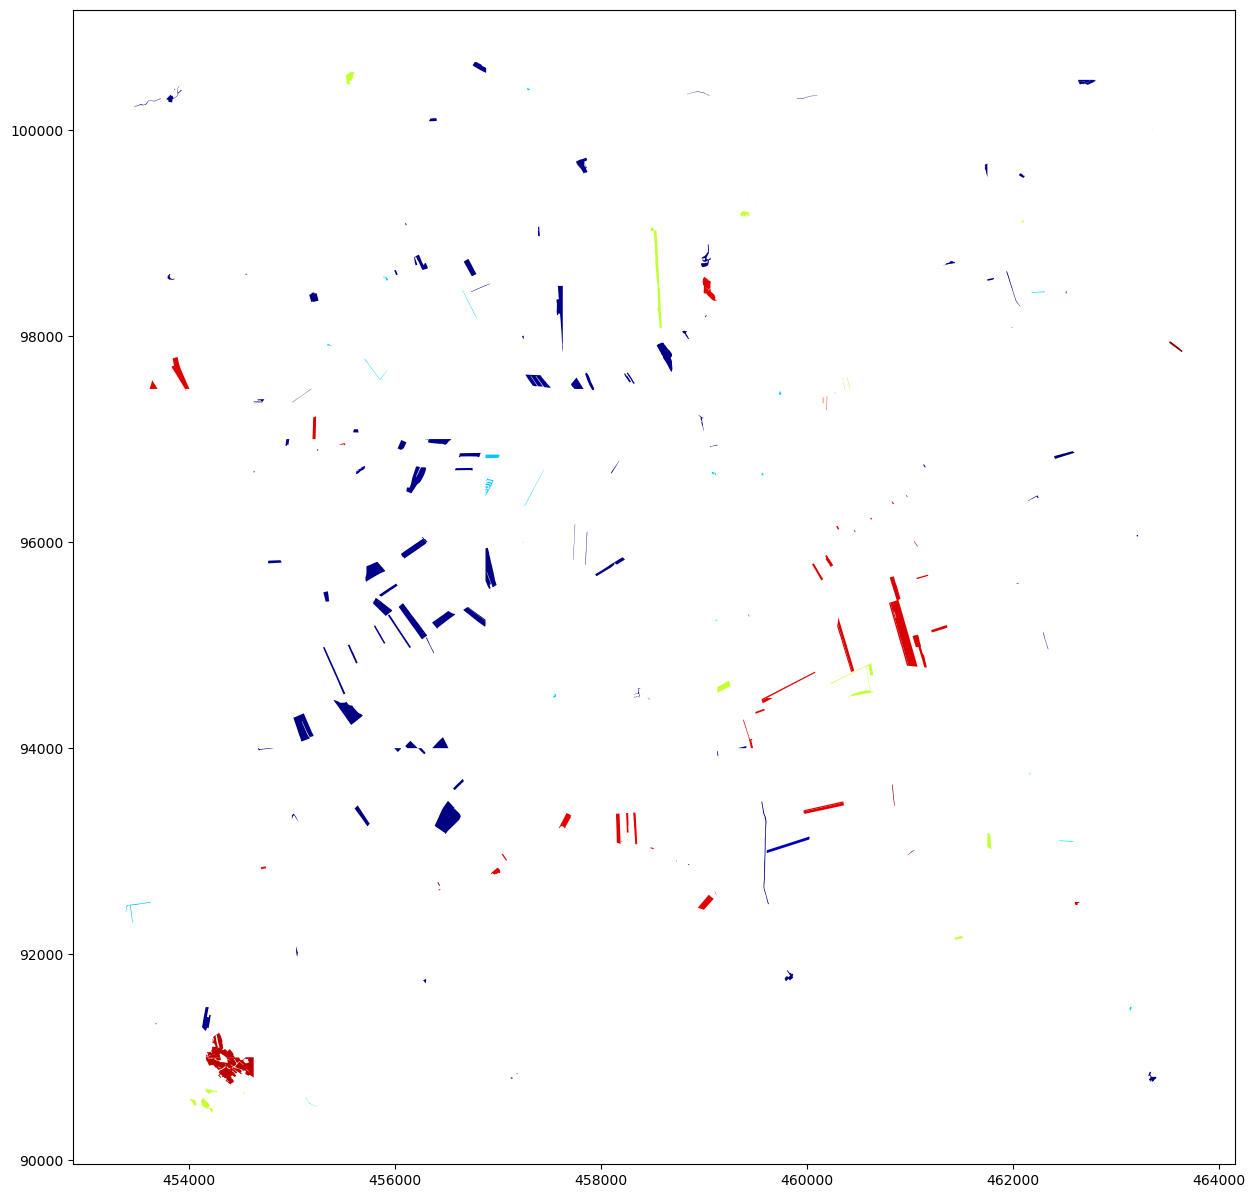

In [13]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 6__: Fltering using PostGres Syntax; see https://www.postgresql.org/docs/9.1/index.html for details

In [14]:
gdf = geodb.get_collection_pg(collection='land_use', where='raba_id=1410')
gdf.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2023-07-31T10:09:28.69554+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


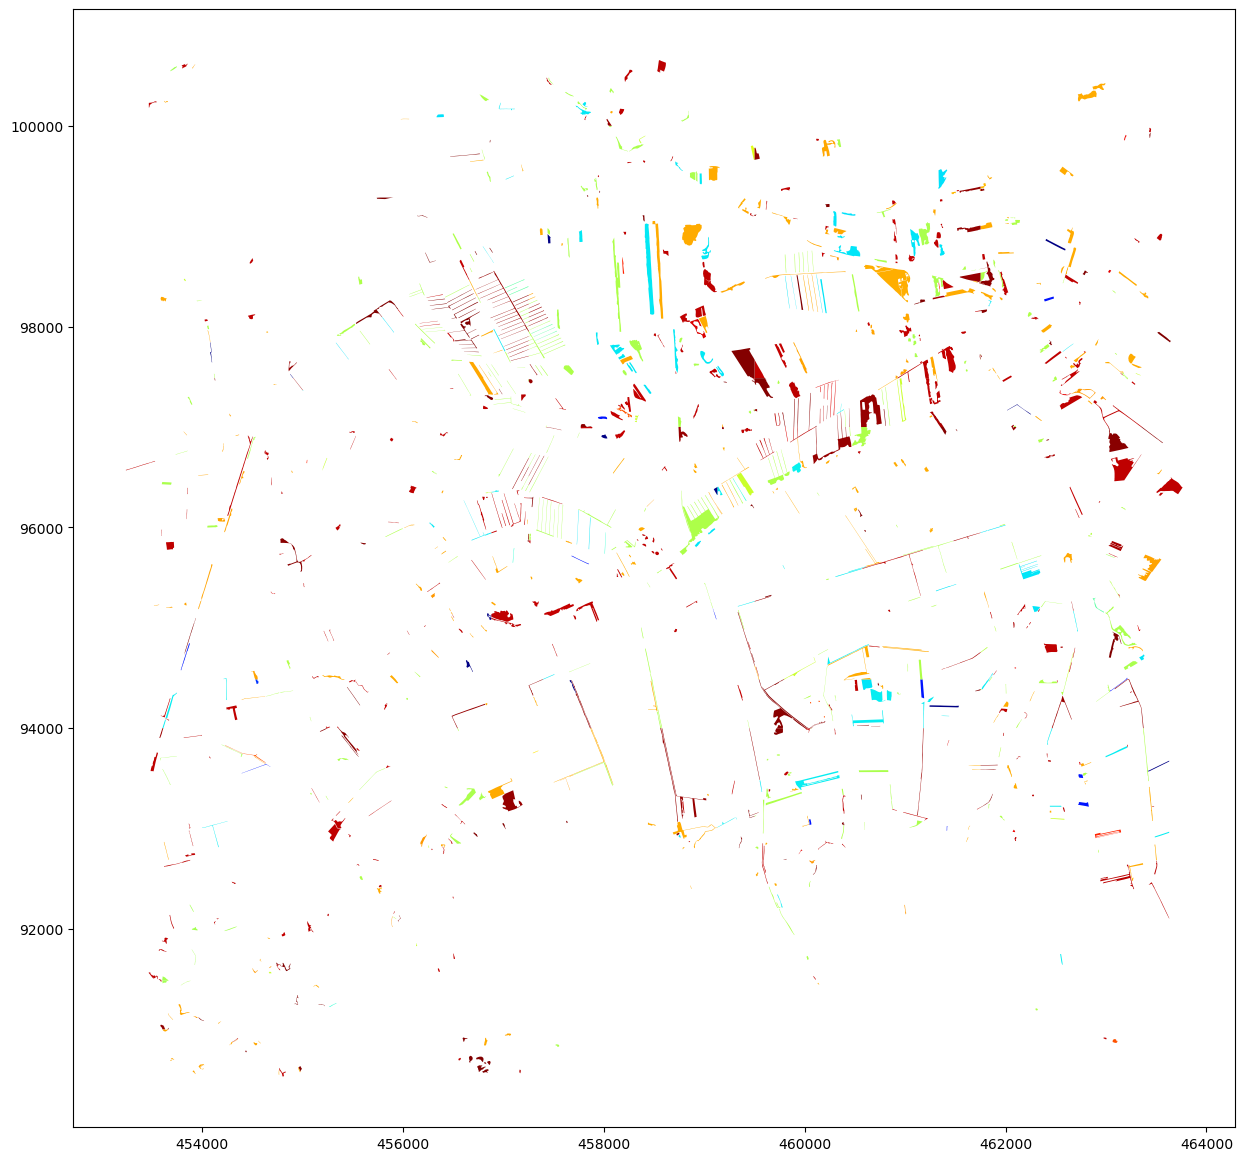

In [15]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation
Here according to data, note that the data set has been reduced to 200 entries above

In [16]:
df = geodb.get_collection_pg('land_use', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

,ct,d_od
0,12,2019-03-21
1,47,2019-02-25
2,17,2019-03-13
3,26,2019-02-20
4,2,2019-04-29
